# Parametric spline to define race course

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
%matplotlib inline 

## Homemade B-splines:

In [18]:
k = 3 # degree of spline
n = 5 # number of control points = n + 1
m = n + k + 1

P = np.array([[0,0,4,0,0],[0,1,1,-1,0]])
P

array([[ 0,  0,  4,  0,  0],
       [ 0,  1,  1, -1,  0]])

In [19]:
T = np.zeros([k+1,])
np.arange(0.0,1.0,1.0/(n+1))


array([ 0.        ,  0.16666667,  0.33333333,  0.5       ,  0.66666667,
        0.83333333])

In [22]:
T[:-1]

array([ 0.,  0.,  0.])

In [25]:
# T = np.array([[0,0,0,1.0/4,2.0/4,3.0/4,1,1,1]]).T
T = np.array([[0,0,0,0,2.0/4,1,1,1,1]]).T
T

array([[ 0. ],
       [ 0. ],
       [ 0. ],
       [ 0. ],
       [ 0.5],
       [ 1. ],
       [ 1. ],
       [ 1. ],
       [ 1. ]])

In [26]:
t = 0.9
N = {}
N[0] = np.array((t >= T[:-1]) * (t < T[1:]), dtype=int)
N[0]

array([[0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0]])

In [29]:
invd = {}
for i in range(k+1):
    invd[i] = T[(i+1):] - T[:-(i+1)]
    
    # take care of empty knot spans
    for j in range(invd[i].shape[0]):
        if invd[i][j] != 0:
            invd[i][j] = 1.0/invd[i][j]
            
for i in range(k+1):
    if i > 0:
        N[i] = ((t-T[:-i])*invd[i-1]*N[i-1])[:-1] + 
        ((T[i:] - t)*invd[i-1]*N[i-1])[1:]
        print N[i]

[[ 0. ]
 [ 0. ]
 [ 0. ]
 [ 0.2]
 [ 0.8]
 [ 0. ]
 [ 0. ]]
[[ 0.  ]
 [ 0.  ]
 [ 0.02]
 [ 0.34]
 [ 0.64]
 [ 0.  ]]
[[ 0.   ]
 [ 0.002]
 [ 0.052]
 [ 0.434]
 [ 0.512]]


In [30]:
tt = np.arange(0,1.01,.01)
rx = np.zeros(tt.shape)
ry = np.zeros(tt.shape)

for j in range(tt.shape[0]):
    t = tt[j]
    N[0] = np.array((t >= T[:-1]) * (t < T[1:]), dtype=float)
    
    # IF t = t_m, set N[-1] = 0
    
    for i in range(k+1):
        if i > 0:
            N[i] = ((t - T[:-i])*invd[i - 1]*N[i - 1])[:-1] + ((T[i:] - t)*invd[i - 1]*N[i - 1])[1:]
    rx[j] = np.dot(P[0],N[k])
    ry[j] = np.dot(P[1],N[k])

/Users/kyle/anaconda/envs/deepAtariEnv/lib/python2.7/site-packages/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


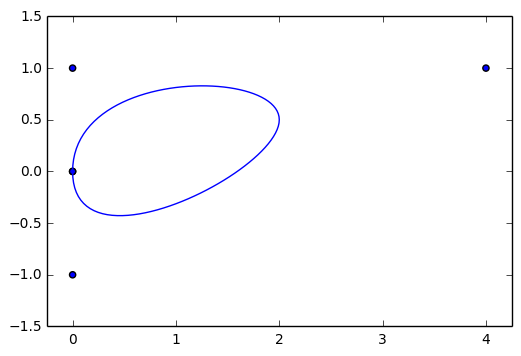

In [8]:
plt.figure()
plt.hold=True
plt.scatter(P[0],P[1])
plt.plot(rx,ry)
# plt.axis([-0.05, 2.05, -0.05, 1.05])
plt.axis('equal')
plt.show()

## Python B-splines

#### See if I can reproduce the B-splines based on the values returned from interpolate.splprep

In [9]:
xs = [1,4,3,6,6,5,4,3]
ys = [6,4,3,2,2.5,3,1,5]

# generates spline points by interpolation
tck, u = interpolate.splprep([xs, ys], s=0) # s is smoothing factor
unew = np.arange(0, 1.01, 0.01)
# evaluate spline at locations specified by unew
out = interpolate.splev(unew, tck)

In [10]:
filename = 'track1'
path = '/Users/kyle/Documents/SCHOOL/Stanford/Research/RoboRace/workspace/trackSplines/'+filename+'/tck.npy'

tck = np.load(path)


In [11]:
knots = tck[0]
controlPoints = tck[1]
degree = tck[2]

P = controlPoints
T = knots
k = degree

In [12]:
invd = {}
for i in range(k+1):
    invd[i] = T[(i+1):] - T[:-(i+1)]
    
    # take care of empty knot spans
    for j in range(invd[i].shape[0]):
        if invd[i][j] != 0:
            invd[i][j] = 1.0/invd[i][j]

In [13]:
tt = np.arange(0,1.01,.01)
rx = np.zeros(tt.shape)
ry = np.zeros(tt.shape)
N = {}

for j in range(tt.shape[0]):
    t = tt[j]
    N[0] = np.array((t >= T[:-1]) * (t < T[1:]), dtype=float)
    for i in range(k+1):
        if i > 0:
            N[i] = ((t - T[:-i])*invd[i - 1]*N[i - 1])[:-1] + ((T[i:] - t)*invd[i - 1]*N[i - 1])[1:]
    rx[j] = np.dot(P[0],N[k])
    ry[j] = np.dot(P[1],N[k])
    # set the last point to be equal to the final control point (otherwise it goes to zero)
    rx[-1] = P[0][-1]
    ry[-1] = P[1][-1]

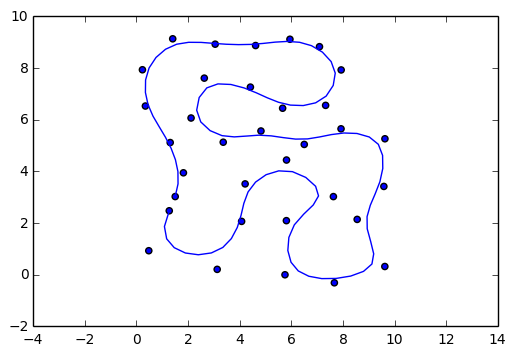

In [14]:
plt.figure()
plt.hold=True
plt.scatter(P[0],P[1])
plt.plot(rx,ry)
# plt.axis([-0.05, 2.05, -0.05, 1.05])
plt.axis('equal')
plt.show()

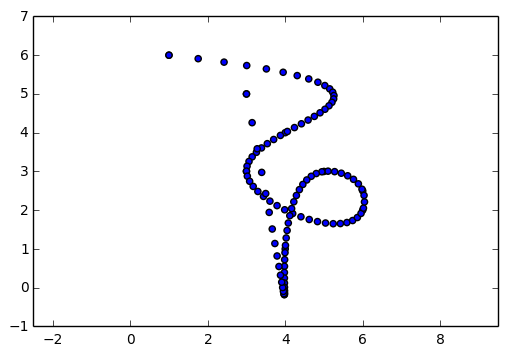

In [15]:
plt.figure()
plt.hold=True
plt.scatter(xs,ys)
plt.scatter(out[0],out[1])
# plt.axis([-0.05, 2.05, -0.05, 1.05])
plt.axis('equal')
plt.show()

## Derivatives, Curvature, Normals

In [16]:
invd = {}
dN = {}
for i in range(k+1):
    invd[i] = T[(i+1):] - T[:-(i+1)]
    
    # take care of empty knot spans
    for j in range(invd[i].shape[0]):
        if invd[i][j] != 0:
            invd[i][j] = 1.0/invd[i][j]
            
for i in range(k+1):
    if i > 0:
        dN[i] = ((i)*invd[i-1]*N[i-1])[:-1] + ((i)*invd[i-1]*N[i-1])[1:]
        print N[i]

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
